# Imports

In [1]:
import numpy as pd 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
#Bring in csv using pandas
df= pd.read_csv('samsung_health.csv')

In [3]:
# Looking at data types and amount of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5777 entries, 0 to 5776
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   heart_rate   5777 non-null   int64 
 1   max          5777 non-null   int64 
 2   start_time   5777 non-null   object
 3   end_time     5777 non-null   object
 4   create_time  5777 non-null   object
 5   update_time  5777 non-null   object
 6   min          5777 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 316.1+ KB


In [4]:
df.isnull().sum() # verify number null values in each column

heart_rate     0
max            0
start_time     0
end_time       0
create_time    0
update_time    0
min            0
dtype: int64

In [5]:
#Looking at shape ( # of rows and columns)
df.shape

(5777, 7)

In [6]:
#Looking at first 10 values
df.head(10)

,heart_rate,max,start_time,end_time,create_time,update_time,min
0,74,74,"06/14/2021, 3:30:59 PM","06/14/2021, 3:30:59 PM","06/14/2021, 3:30:59 PM","06/14/2021, 3:30:59 PM",74
1,62,79,"06/14/2021, 4:10:59 PM","06/14/2021, 4:10:59 PM","06/14/2021, 4:10:59 PM","06/14/2021, 4:10:59 PM",62
2,68,79,"06/14/2021, 4:50:59 PM","06/14/2021, 4:50:59 PM","06/14/2021, 4:50:59 PM","06/14/2021, 4:50:59 PM",62
3,75,79,"06/14/2021, 5:10:59 PM","06/14/2021, 5:10:59 PM","06/14/2021, 5:10:59 PM","06/14/2021, 5:10:59 PM",62
4,69,79,"06/14/2021, 5:00:59 PM","06/14/2021, 5:00:59 PM","06/14/2021, 5:00:59 PM","06/14/2021, 5:00:59 PM",62
5,69,108,"06/14/2021, 6:10:59 PM","06/14/2021, 6:10:59 PM","06/14/2021, 6:10:59 PM","06/14/2021, 6:10:59 PM",62
6,68,79,"06/14/2021, 4:20:59 PM","06/14/2021, 4:20:59 PM","06/14/2021, 4:20:59 PM","06/14/2021, 4:20:59 PM",62
7,69,108,"06/14/2021, 5:50:59 PM","06/14/2021, 5:50:59 PM","06/14/2021, 5:50:59 PM","06/14/2021, 5:50:59 PM",62
8,79,79,"06/14/2021, 3:50:59 PM","06/14/2021, 3:50:59 PM","06/14/2021, 3:50:59 PM","06/14/2021, 3:50:59 PM",74
9,65,79,"06/14/2021, 4:00:59 PM","06/14/2021, 4:00:59 PM","06/14/2021, 4:00:59 PM","06/14/2021, 4:00:59 PM",65


# Takeways:
- No null values present
- decide whether to change datatypes of start_time, end_time, create_time, and update_time

# Prepare

In [7]:
# Change times to datetime format
df[['start_time','end_time', 'update_time']] = df[['start_time','end_time', 'update_time']].apply(pd.to_datetime)

In [8]:
# Verify datatype was changed for start time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5777 entries, 0 to 5776
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   heart_rate   5777 non-null   int64         
 1   max          5777 non-null   int64         
 2   start_time   5777 non-null   datetime64[ns]
 3   end_time     5777 non-null   datetime64[ns]
 4   create_time  5777 non-null   object        
 5   update_time  5777 non-null   datetime64[ns]
 6   min          5777 non-null   int64         
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 316.1+ KB


In [9]:
df.head()

,heart_rate,max,start_time,end_time,create_time,update_time,min
0,74,74,2021-06-14 15:30:59,2021-06-14 15:30:59,"06/14/2021, 3:30:59 PM",2021-06-14 15:30:59,74
1,62,79,2021-06-14 16:10:59,2021-06-14 16:10:59,"06/14/2021, 4:10:59 PM",2021-06-14 16:10:59,62
2,68,79,2021-06-14 16:50:59,2021-06-14 16:50:59,"06/14/2021, 4:50:59 PM",2021-06-14 16:50:59,62
3,75,79,2021-06-14 17:10:59,2021-06-14 17:10:59,"06/14/2021, 5:10:59 PM",2021-06-14 17:10:59,62
4,69,79,2021-06-14 17:00:59,2021-06-14 17:00:59,"06/14/2021, 5:00:59 PM",2021-06-14 17:00:59,62


In [10]:
df[df['start_time'] != df['end_time']]

,heart_rate,max,start_time,end_time,create_time,update_time,min
33,80,115,2021-06-14 19:00:00,2021-06-14 19:59:31,"06/14/2021, 7:59:31 PM",2021-06-14 19:59:31,79
34,93,121,2021-06-14 20:00:00,2021-06-14 20:22:29,"06/14/2021, 8:22:29 PM",2021-06-14 20:22:29,72
35,58,142,2021-06-14 22:00:00,2021-06-14 22:59:43,"06/14/2021, 10:59:43 PM",2021-06-15 15:13:47,52
36,55,83,2021-06-14 23:00:00,2021-06-14 23:59:43,"06/14/2021, 11:59:43 PM",2021-06-14 23:59:43,53
37,68,92,2021-06-15 00:00:00,2021-06-15 00:59:42,"06/15/2021, 12:59:42 AM",2021-06-15 00:59:42,51
...,...,...,...,...,...,...,...
5742,74,116,2021-08-22 18:00:00,2021-08-22 18:59:52,"08/22/2021, 6:59:52 PM",2021-08-22 18:59:52,67
5746,71,98,2021-08-22 19:00:00,2021-08-22 19:59:51,"08/22/2021, 7:59:51 PM",2021-08-22 19:59:51,60
5760,62,92,2021-08-22 20:00:00,2021-08-22 20:59:50,"08/22/2021, 8:59:50 PM",2021-08-22 20:59:50,55
5773,56,96,2021-08-22 21:00:00,2021-08-22 21:59:50,"08/22/2021, 9:59:50 PM",2021-08-22 21:59:50,49


- ignore these data points for now.

In [11]:
#Look at first 10 values
df.head(10)

,heart_rate,max,start_time,end_time,create_time,update_time,min
0,74,74,2021-06-14 15:30:59,2021-06-14 15:30:59,"06/14/2021, 3:30:59 PM",2021-06-14 15:30:59,74
1,62,79,2021-06-14 16:10:59,2021-06-14 16:10:59,"06/14/2021, 4:10:59 PM",2021-06-14 16:10:59,62
2,68,79,2021-06-14 16:50:59,2021-06-14 16:50:59,"06/14/2021, 4:50:59 PM",2021-06-14 16:50:59,62
3,75,79,2021-06-14 17:10:59,2021-06-14 17:10:59,"06/14/2021, 5:10:59 PM",2021-06-14 17:10:59,62
4,69,79,2021-06-14 17:00:59,2021-06-14 17:00:59,"06/14/2021, 5:00:59 PM",2021-06-14 17:00:59,62
5,69,108,2021-06-14 18:10:59,2021-06-14 18:10:59,"06/14/2021, 6:10:59 PM",2021-06-14 18:10:59,62
6,68,79,2021-06-14 16:20:59,2021-06-14 16:20:59,"06/14/2021, 4:20:59 PM",2021-06-14 16:20:59,62
7,69,108,2021-06-14 17:50:59,2021-06-14 17:50:59,"06/14/2021, 5:50:59 PM",2021-06-14 17:50:59,62
8,79,79,2021-06-14 15:50:59,2021-06-14 15:50:59,"06/14/2021, 3:50:59 PM",2021-06-14 15:50:59,74
9,65,79,2021-06-14 16:00:59,2021-06-14 16:00:59,"06/14/2021, 4:00:59 PM",2021-06-14 16:00:59,65


In [12]:
#create new dataframe 
new_df= df[['heart_rate', 'start_time']]

In [13]:
# Look at values in new df
new_df.head()

,heart_rate,start_time
0,74,2021-06-14 15:30:59
1,62,2021-06-14 16:10:59
2,68,2021-06-14 16:50:59
3,75,2021-06-14 17:10:59
4,69,2021-06-14 17:00:59


We made a new dataframe without end_time, create_time, and update_time because majority of the values were very similar.

In [14]:
#Create new columns using .dt accessor 
new_df['month'] = new_df.start_time.dt.month
new_df['day'] = new_df.start_time.dt.month
new_df['weekday'] = new_df.start_time.dt.day_name()
new_df.head(10)

,heart_rate,start_time,month,day,weekday
0,74,2021-06-14 15:30:59,6,6,Monday
1,62,2021-06-14 16:10:59,6,6,Monday
2,68,2021-06-14 16:50:59,6,6,Monday
3,75,2021-06-14 17:10:59,6,6,Monday
4,69,2021-06-14 17:00:59,6,6,Monday
5,69,2021-06-14 18:10:59,6,6,Monday
6,68,2021-06-14 16:20:59,6,6,Monday
7,69,2021-06-14 17:50:59,6,6,Monday
8,79,2021-06-14 15:50:59,6,6,Monday
9,65,2021-06-14 16:00:59,6,6,Monday


In [15]:
#set time as index and sort_index
new_df= new_df.set_index('start_time').sort_index()

<b>Remember time may not always be in the correct order, make sure to always sort time.</b>

In [16]:
#verify start time was set a index
new_df.head()

,heart_rate,month,day,weekday
start_time,,,,
2021-06-14 15:30:59,74,6,6,Monday
2021-06-14 15:50:59,79,6,6,Monday
2021-06-14 16:00:59,65,6,6,Monday
2021-06-14 16:10:59,62,6,6,Monday
2021-06-14 16:20:59,68,6,6,Monday


In [17]:
#Look at datatypes and info for new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5777 entries, 2021-06-14 15:30:59 to 2021-08-22 22:11:01
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   heart_rate  5777 non-null   int64 
 1   month       5777 non-null   int64 
 2   day         5777 non-null   int64 
 3   weekday     5777 non-null   object
dtypes: int64(3), object(1)
memory usage: 225.7+ KB


In [18]:
new_df.columns

Index(['heart_rate', 'month', 'day', 'weekday'], dtype='object')

In [19]:
#drop weekday b/c object datatype and will not be able to put into model.
#do not need this moving forward
new_df.drop(axis=1, columns=['month', 'day', 'weekday'], inplace= True)

### Split
1. We will use the training proportion method to split.
2. Identify the total length of the dataframe and multiple by train_prop to get the number of rows that equates to the first x% of the dataframe, which equates to the first x% of the time covered in the data. (x = train_prop * 100)
3. Select row indices from 0 up to the index representing x-percentile for train, and from the index representing x-percentile through the end of the dataframe for test. In both of these, we will reset the index in order to return dataframes sorted by datetime.
4. Return train and test dataframes.

In [20]:
#split function
train_size = int(len(new_df) * .5)
validate_size = int(len(new_df) * .3)
test_size = int(len(new_df) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = new_df[: train_size]
validate = new_df[train_size : validate_end_index]
test = new_df[validate_end_index : ]

**Verify Splits**

In [21]:
#Does the length of each df equate to the length of the original df?
train.shape, validate.shape, test.shape

((2888, 1), (1733, 1), (1156, 1))

In [22]:
# Does the first row of original df equate to the first row of train?
print(new_df.head(1) == train.head(1))

                     heart_rate
start_time                     
2021-06-14 15:30:59        True


In [23]:
# Is the last row of train the day before the first row of validate? And the same for validate to test?
pd.concat([train.tail(1), validate.head(1)])
pd.concat([validate.tail(1), test.head(1)])

,heart_rate
start_time,
2021-08-10 20:41:05,62
2021-08-10 20:59:06,59


In [24]:
# Is the last row of test the same as the last row of our original dataframe?
pd.concat([test.tail(1), new_df.tail(1)])

,heart_rate
start_time,
2021-08-22 22:11:01,59
2021-08-22 22:11:01,59


# Takeways: 
- will need to split data before exploring 
- created new features (month, day, and weekday)
- data is from July 2021- August 2021

# Explore

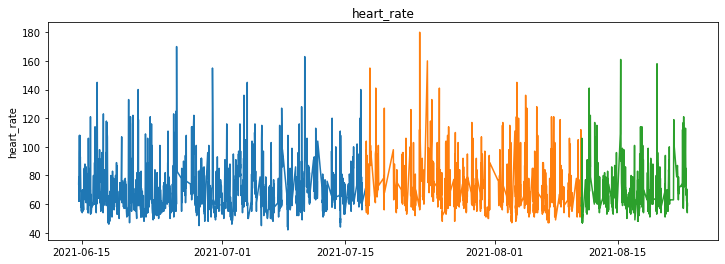

In [25]:
#plot our data first, viewing where the data is split into train and test.
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

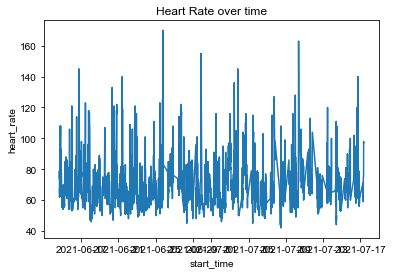

In [26]:
#Visual of time vs heart rate
sns.lineplot(x= 'start_time', y= 'heart_rate', data=train)
plt.title("Heart Rate over time")
sns.set(rc={'figure.figsize':(24,18)})

Takeaways:
- Peaks may be when active and low peaks may be sedentary.

## Visualizations
- # We'll store our target in a variable named y for ease of access.There several techniques for time series data visualization.

In [27]:
# store our target in a variable named y for ease of access and for visualization purposes
y= train.heart_rate

y.head()

start_time
2021-06-14 15:30:59    74
2021-06-14 15:50:59    79
2021-06-14 16:00:59    65
2021-06-14 16:10:59    62
2021-06-14 16:20:59    68
Name: heart_rate, dtype: int64

### Method 1:
Don't consider the time series:
One method we could do is to ignore the time series component of our data, and use all the other visualzation techniques we know to our data.

<AxesSubplot:ylabel='Frequency'>

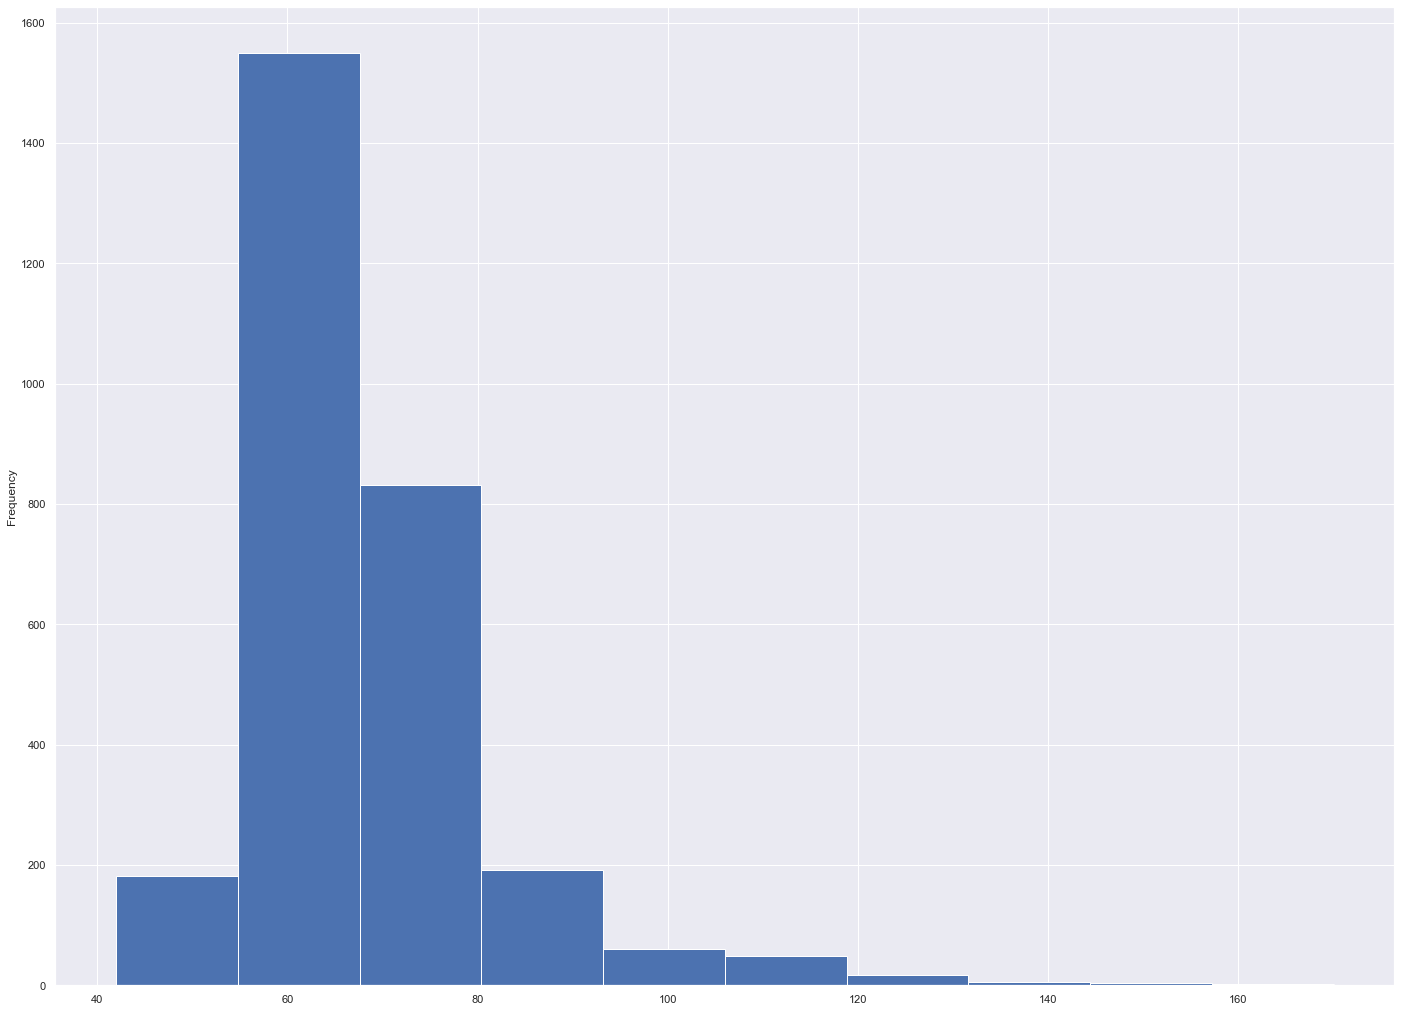

In [28]:
# histogram to show the distribution of our target variable
y.plot.hist()

### Method 2:
A second method is we could also treat components of the date as a seperate categorical feature.

[Text(0.5, 1.0, 'Average Heart Rate by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Heart Rate')]

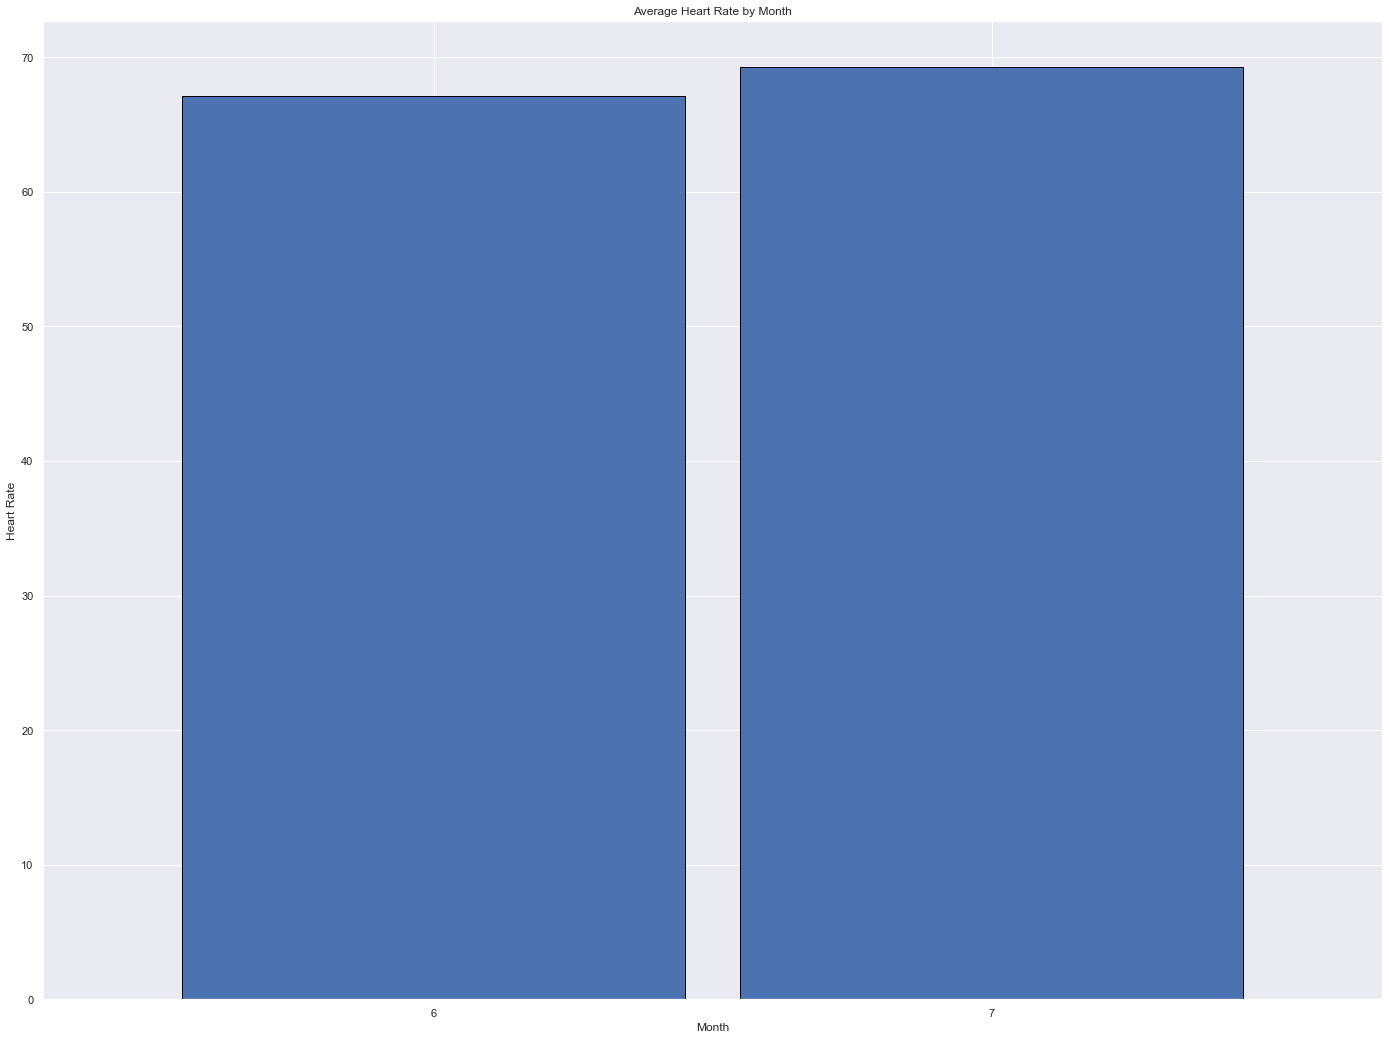

In [29]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Heart Rate by Month', xlabel='Month', ylabel='Heart Rate')

[Text(0.5, 1.0, 'Average Heart Rate by Weekday'),
 Text(0.5, 17.200000000000017, 'Weekday'),
 Text(17.200000000000045, 0.5, 'Heart Rate')]

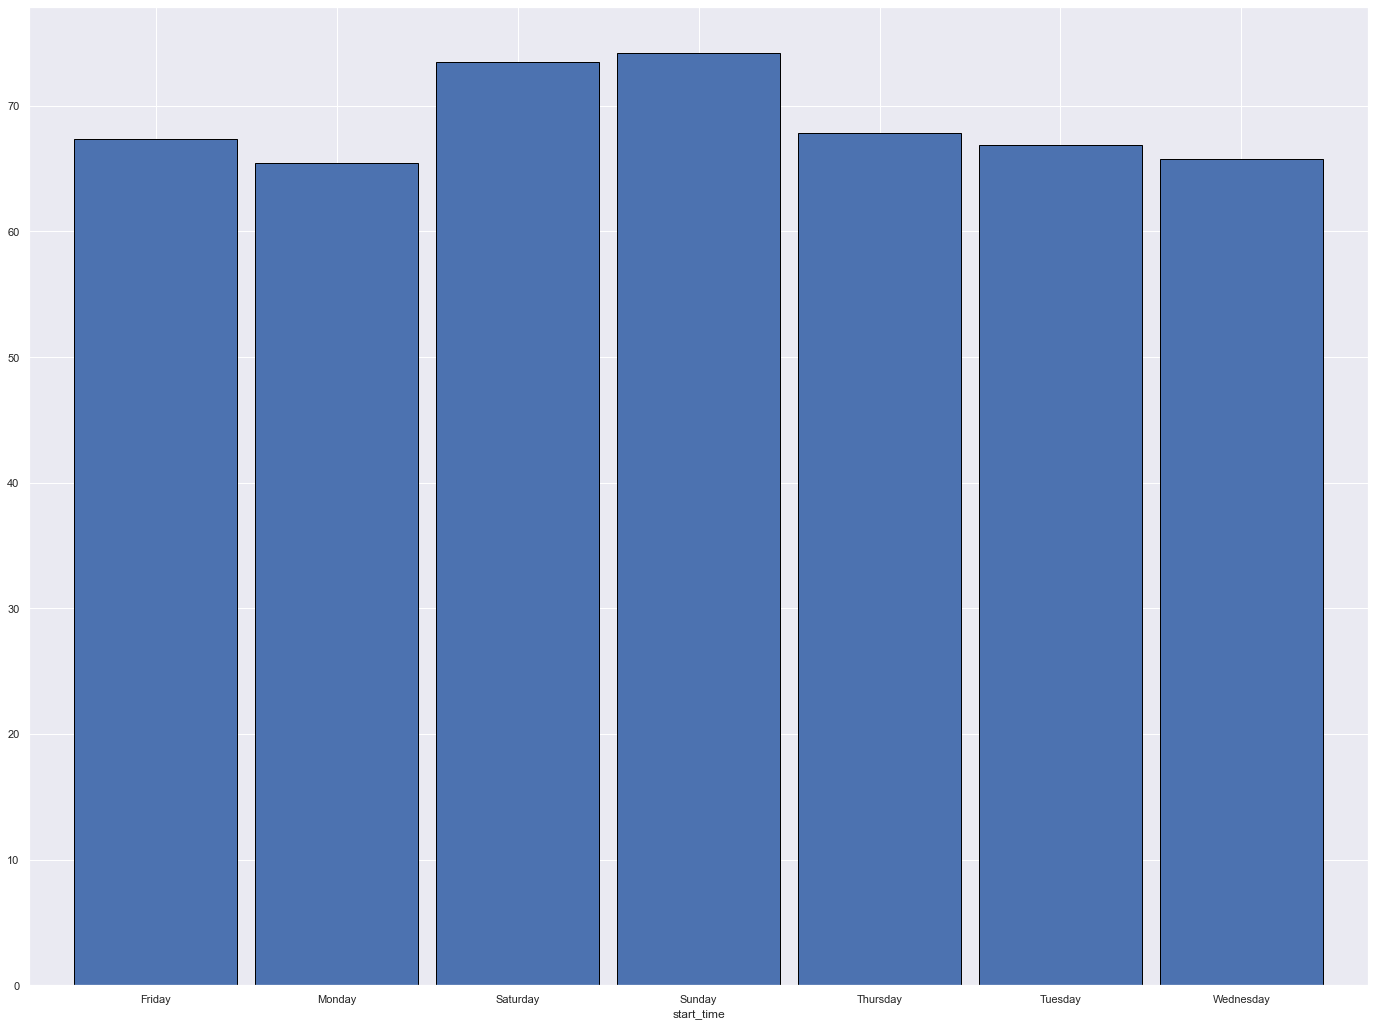

In [30]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Heart Rate by Weekday', xlabel='Weekday', ylabel='Heart Rate')

In [31]:
y

start_time
2021-06-14 15:30:59    74
2021-06-14 15:50:59    79
2021-06-14 16:00:59    65
2021-06-14 16:10:59    62
2021-06-14 16:20:59    68
                       ..
2021-07-17 08:00:00    74
2021-07-17 08:32:39    75
2021-07-17 08:45:52    77
2021-07-17 08:50:13    98
2021-07-17 08:53:43    97
Name: heart_rate, Length: 2888, dtype: int64

<AxesSubplot:xlabel='weekday', ylabel='heart_rate'>

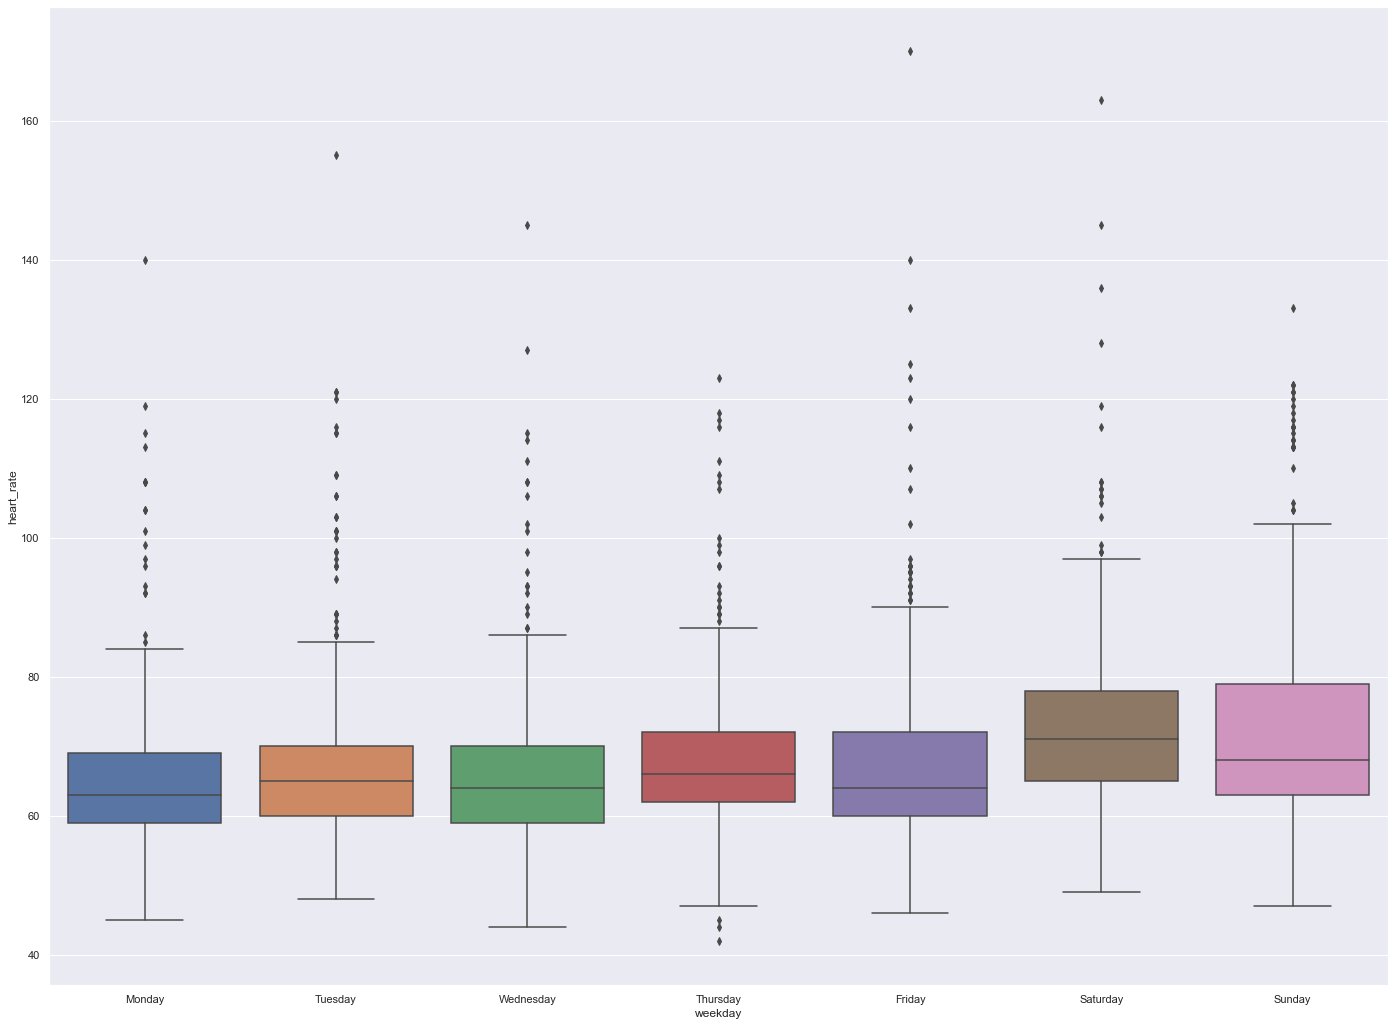

In [32]:
(
    y.reset_index()
    .assign(weekday=lambda df: df.start_time.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='heart_rate', x='weekday')
)

### Method 3: 
Visualize the target over time

<AxesSubplot:xlabel='start_time'>

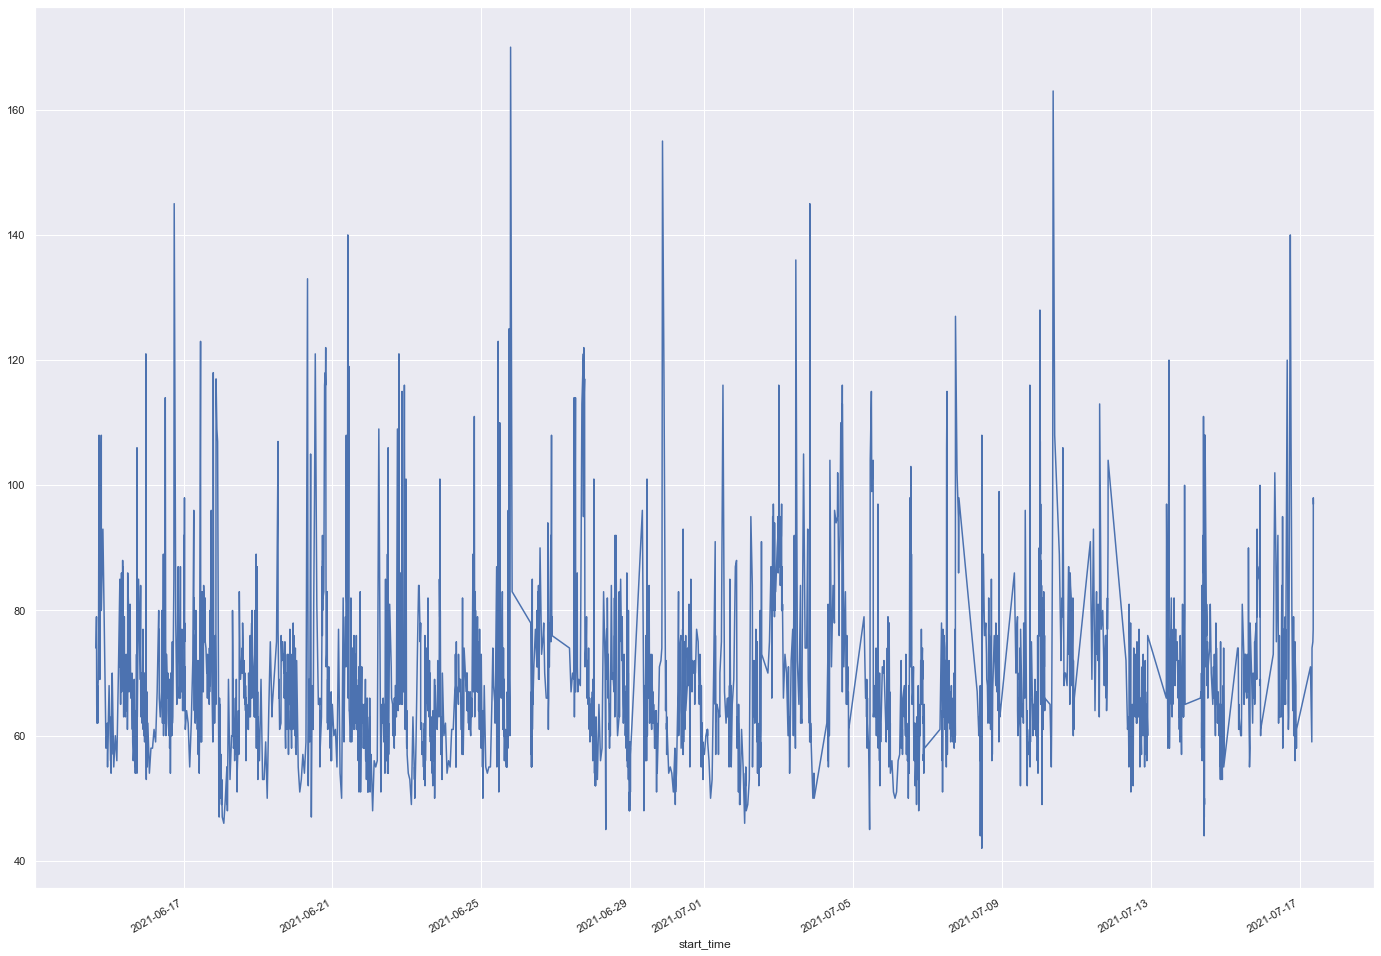

In [33]:
# can be as simple as calling .plot on a dataframe or series with a datetime index.
y.plot()

Takeaway: alot of noise difficult to see pattern. Can see there are many peaks and valleys.
- see if there are any anomalies here

#### Resample our target and visualize it over various time periods.

Arguments for .resample:
- 3T= 3 minute bins
- 3S = 3 second bins
- 3H = 3 hour bins

Text(0, 0.5, 'Heart Rate')

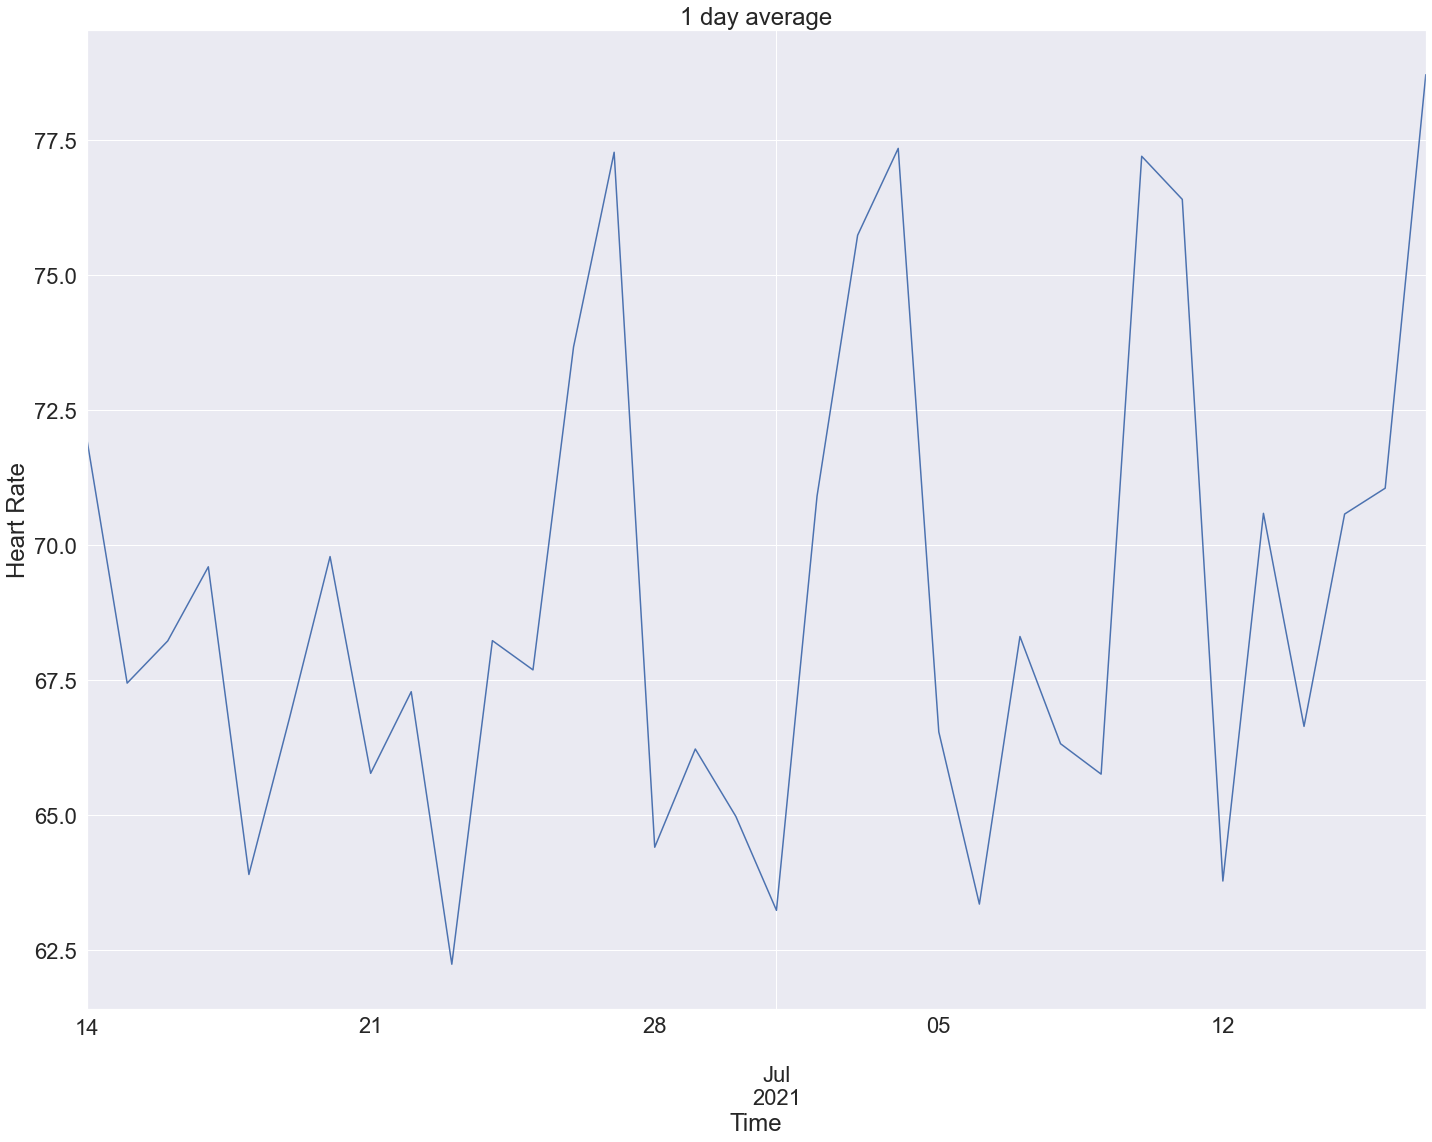

In [34]:
#1 Day average chart
sns.set(font_scale = 2) # change font size of chart labels
y.resample('24H').mean().plot(title='1 day average') #resample our target ('heart_rate') and visualize it over various time periods.
plt.xlabel('Time')
plt.ylabel('Heart Rate')

Takeway: see a pattern of a peak about every 7 days. No pattern seen for valleys.

Text(0, 0.5, 'heart_rate')

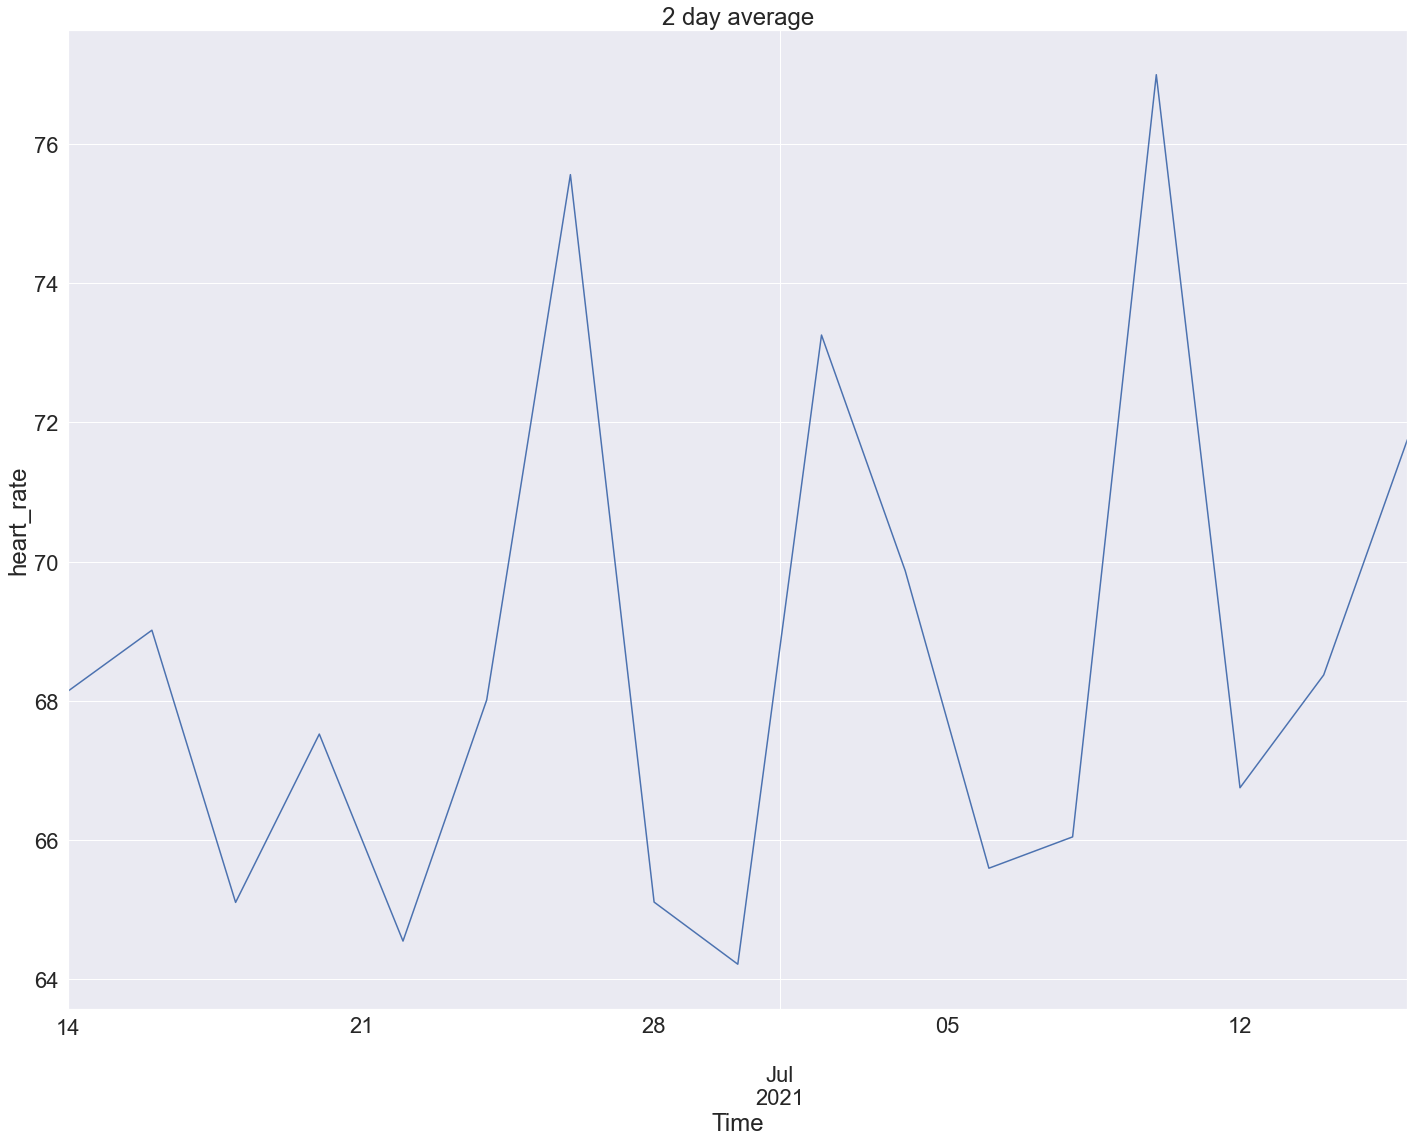

In [85]:
# 2 day average visual
sns.set(font_scale = 2) # change font size of chart labels
y.resample('48H').mean().plot(title='2 day average')  #resample our target ('heart_rate') and visualize it over various time periods.
plt.xlabel('Time')
plt.ylabel('heart_rate')

Takeway: see a pattern of a peak and valleys about every 7 days. Maybe a weekly routine may be why there is a pattern.

Text(0, 0.5, 'heart_rate')

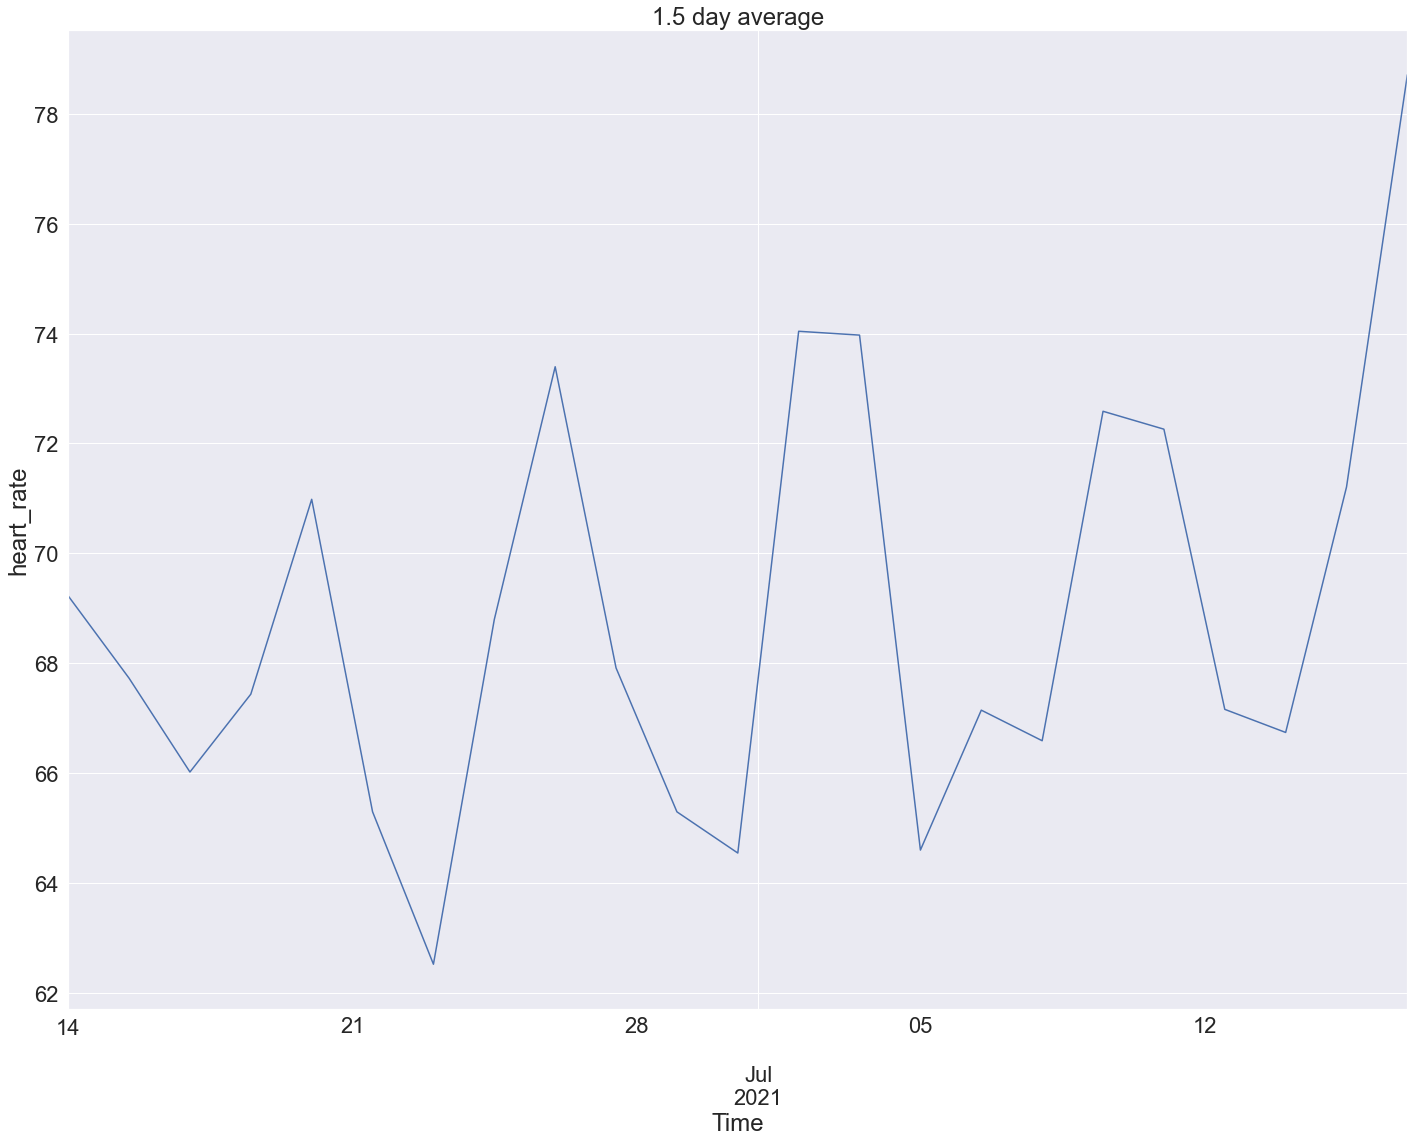

In [36]:
# 1.5 day average visual
sns.set(font_scale = 2) # change font size of chart labels
y.resample('36H').mean().plot(title='1.5 day average')  #resample our target ('heart_rate') and visualize it over various time periods.
plt.xlabel('Time')
plt.ylabel('heart_rate')

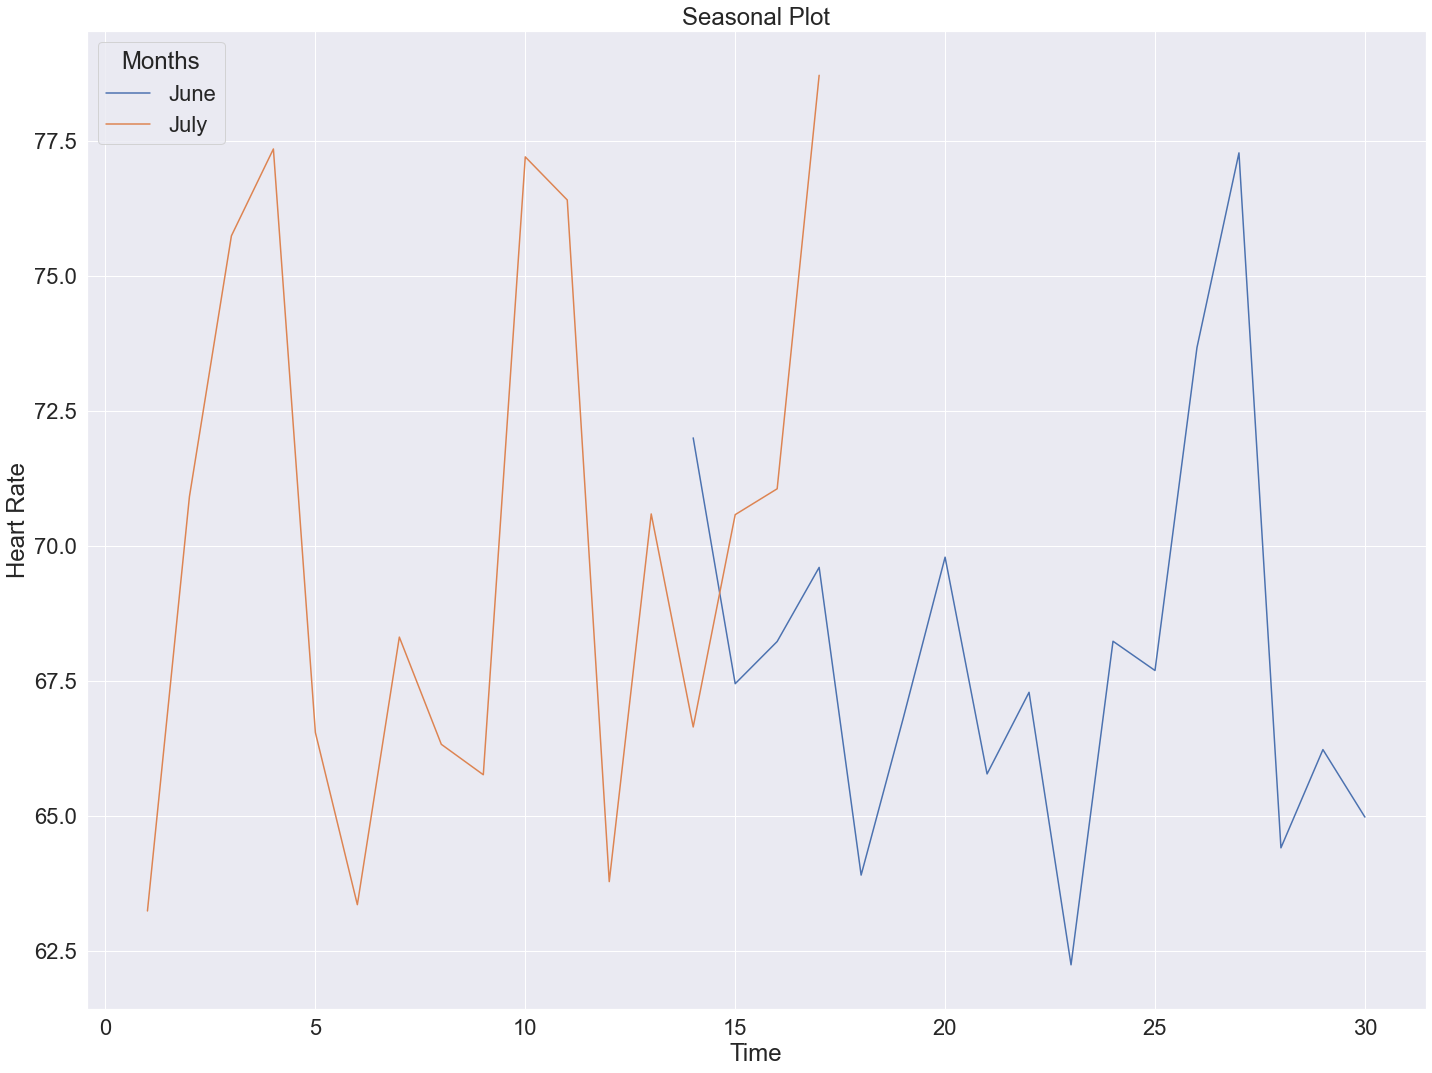

In [37]:
#seasonal plot is one that shows the comparison of multiple days together
y.groupby([y.index.month, y.index.day]).mean().unstack(0).plot(title='Seasonal Plot')

plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.legend(title='Months', loc='upper left', labels=['June', 'July'])

- No seasonal pattern seen in the 2 months.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


,this_week,the_next_week
start_time,,
2021-06-20,67.621777,67.594937
2021-06-27,67.594937,68.029703
2021-07-04,68.029703,68.798587
2021-07-11,68.798587,68.360104
2021-07-18,68.360104,NaN


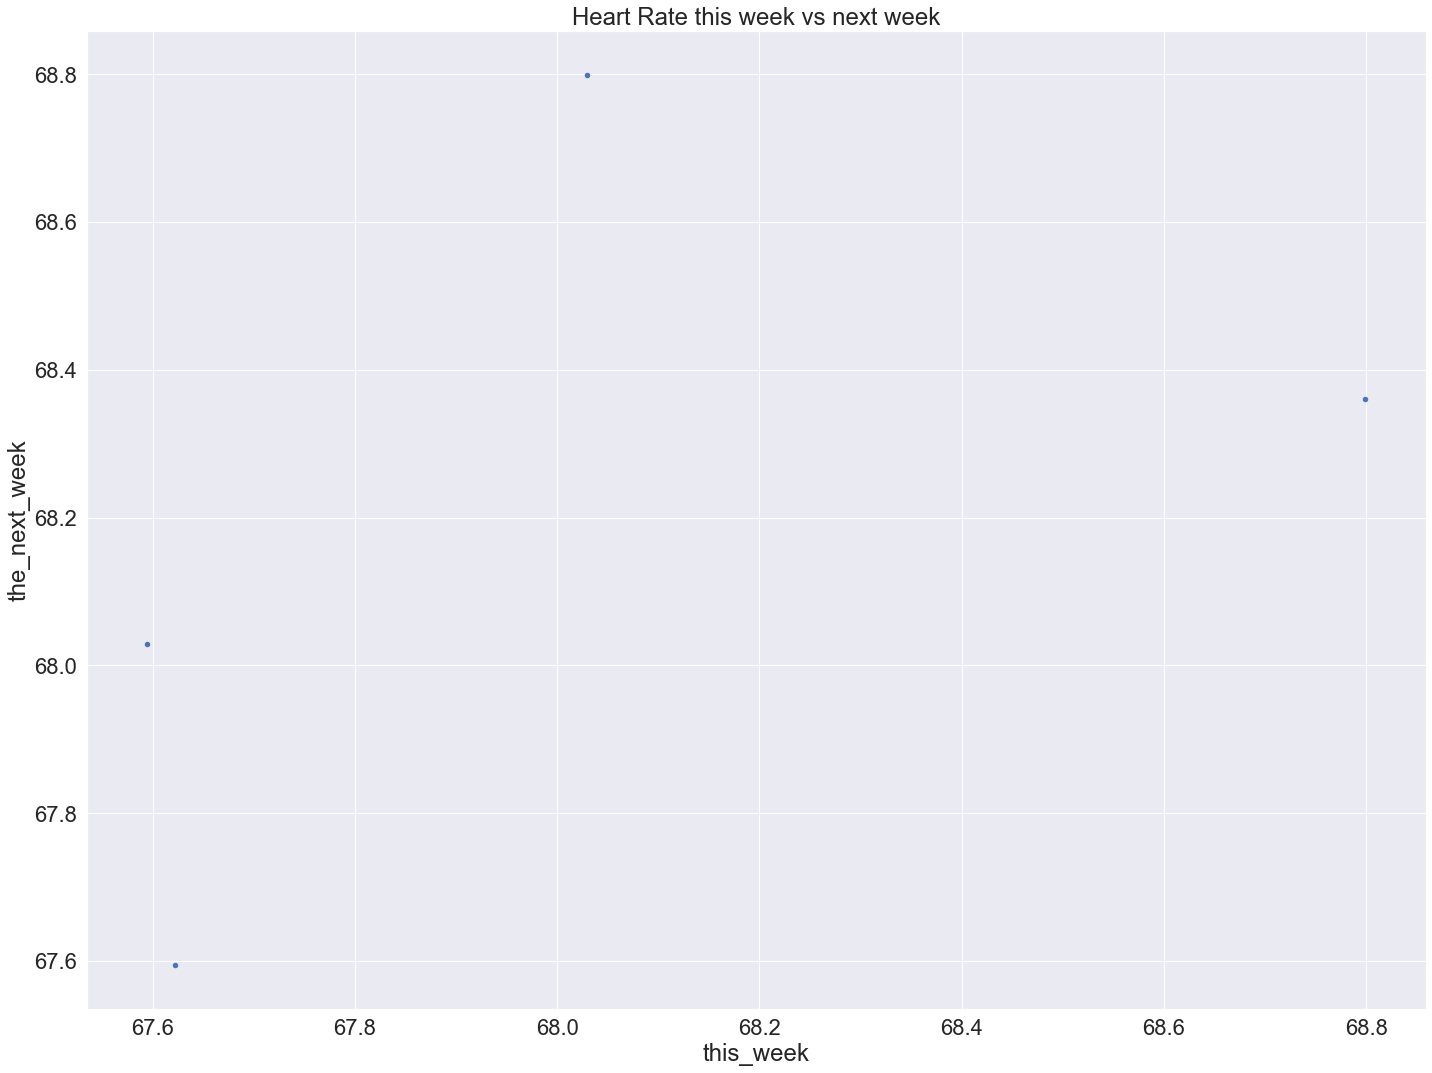

In [38]:
#visual for 2 weeks
weekly =train.resample('W').mean() #create new dataframe with target resampled by week
weekly['the_next_week'] = weekly.heart_rate.shift(-1) #create new column for next week by shifting
weekly = weekly.rename(columns={'heart_rate': 'this_week'}) # rename heart_rate column to this week
weekly.plot.scatter(x='this_week', y='the_next_week') # plot this_week vs next_week
plt.title('Heart Rate this week vs next week') #chart title
weekly # print weekly dataframe

A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

Takeaway: Difficult to see a pattern here. We may not have enough data.

##### Autocorrelation Plot
Autocorrelation is a measure of the linear relationship between lagged values of a time series. 
An autocorrelation plot shows the correlation coefficient as a function of lag time.
- Autocorrelation can help us identify seasonality by looking at the peaks and valleys of the resulting visualization. The peaks can tells us the frequency with which the seasonality repeats itself, and the valleys show us where the correlation is the most negative.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

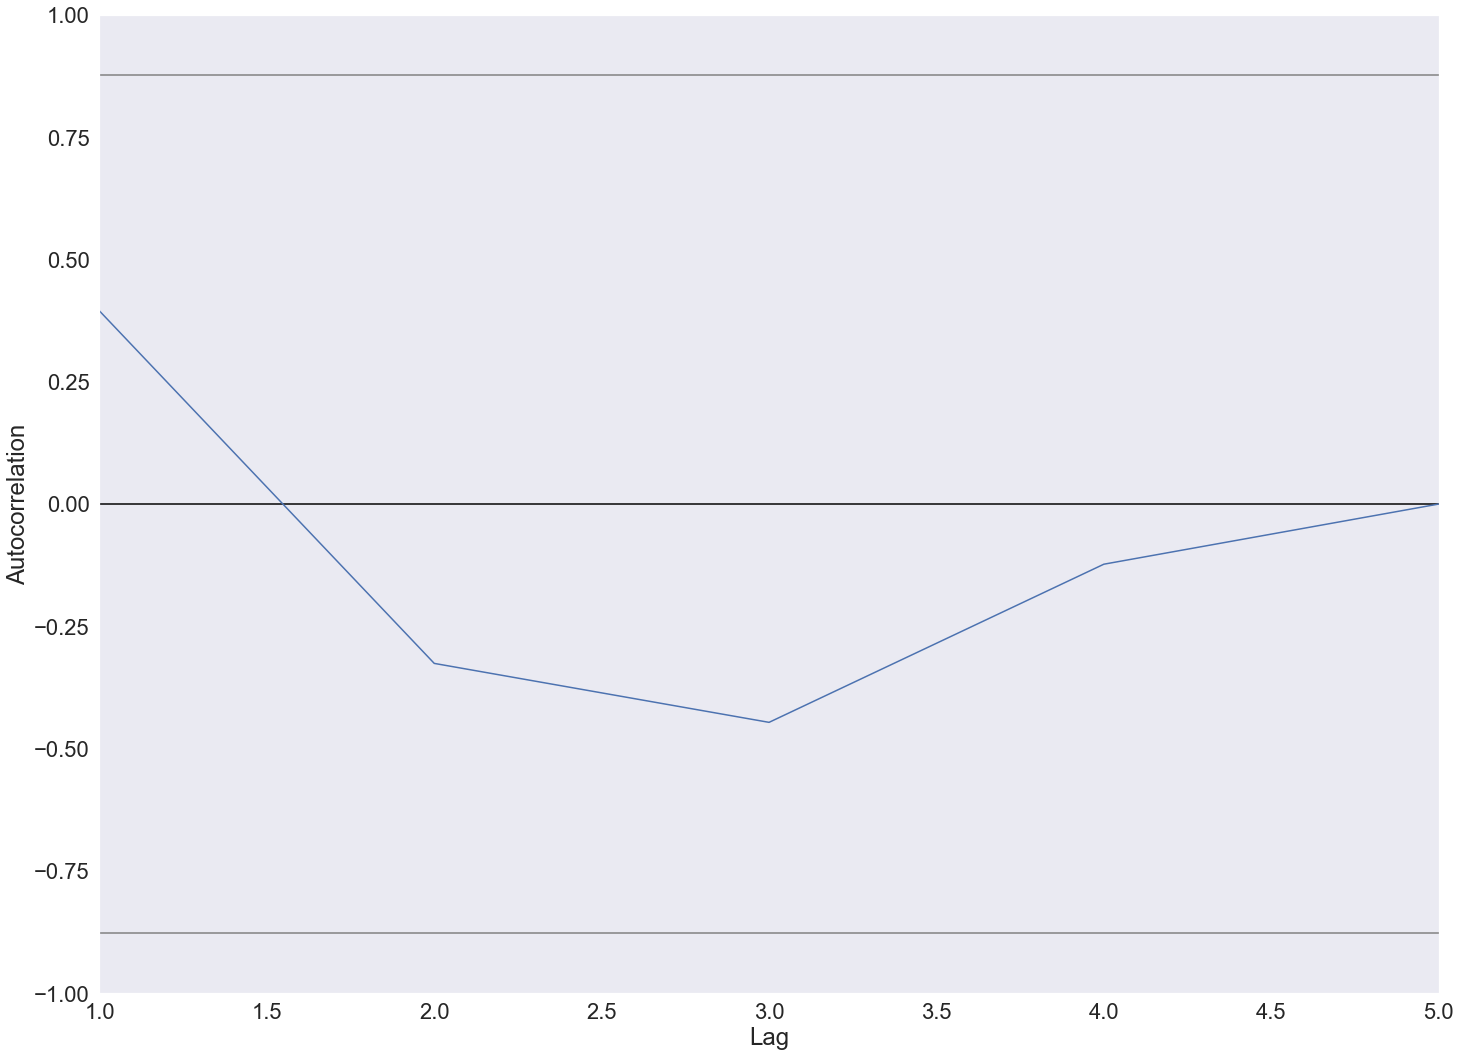

In [39]:
pd.plotting.autocorrelation_plot(train.heart_rate.resample('W').mean())

# Modeling

- Note:
    - There is no baseline model for time series

In [40]:
# evaluation function to compute rmse
def evaluate(target_var, yhat_df):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [41]:
# plot and evaluate 
def plot_and_eval(target_var, yhat_df):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var, yhat_df)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

plot_and_eval() will use the evaluate function and also plot train and test values with the predicted values in order to compare performance.

# Last observed value
The simplest method for forecasting is to predict all future values to be the last observed value.

**Make Predictions**

In [42]:
Heart_Rate = train['heart_rate'][-1:][0]


yhat_df = pd.DataFrame({'heart_rate': [Heart_Rate]}, 
                       index = validate.index)

yhat_df.head(2)

,heart_rate
start_time,
2021-07-17 08:57:13,97
2021-07-17 09:00:00,97


heart_rate -- RMSE: 32


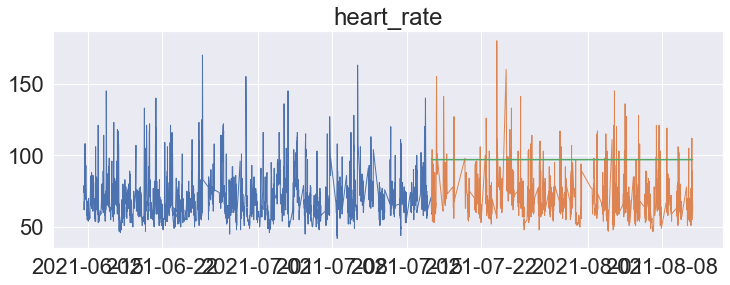

In [43]:
for col in train.columns:
    if col != 'month':
        plot_and_eval(col, yhat_df)
    else:
        break;

when peeking into yhat_df you will see that every predicted value is the same.

**Plot Actual vs. Predicted Values**

Excluded max column here because it was having issues.

In [44]:
#rmse score for Last observed value
last_observed_value_rmse= evaluate('heart_rate', yhat_df)


last_observed_value_rmse

32.0

# Simple Average

- Take the simple average of historical values and use that value to predict future values.

- This is a good option for an initial baseline. Every future datapoint (those in 'test') will be assigned the same value, and that value will be the overall mean of the values in train.

In [45]:
hr = round(train['heart_rate'].mean(), 2)


items = round(train['heart_rate'].mean(), 2)

def make_predictions():
    yhat_df = pd.DataFrame({'heart_rate': [hr],
                           }, index = validate.index)
    return yhat_df

yhat_df_simple_avg = make_predictions()

In [46]:
yhat_df_simple_avg.head(2)

,heart_rate
start_time,
2021-07-17 08:57:13,68.03
2021-07-17 09:00:00,68.03


**Plot Actual vs. Predicted Values**



heart_rate -- RMSE: 13


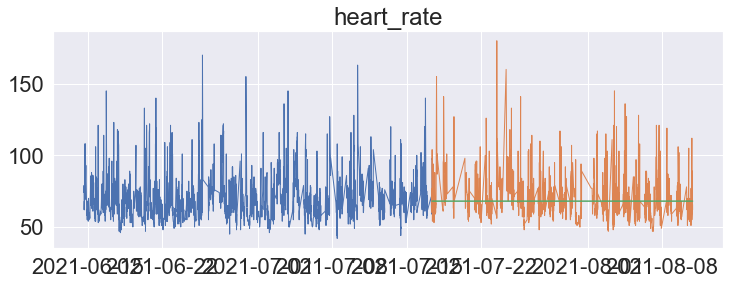

In [47]:
for col in train.columns:
    if col != 'month':
        plot_and_eval(col, yhat_df_simple_avg)
    else:
        break;

# Moving Average

Use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value.

**Make Predictions**

In [48]:
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 30

hr = round(train['heart_rate'].rolling(period).mean().iloc[-1], 2)

yhat_df_moving_avg = make_predictions()
yhat_df_moving_avg.head(3)

,heart_rate
start_time,
2021-07-17 08:57:13,66.87
2021-07-17 09:00:00,66.87
2021-07-17 09:04:08,66.87


heart_rate -- RMSE: 13


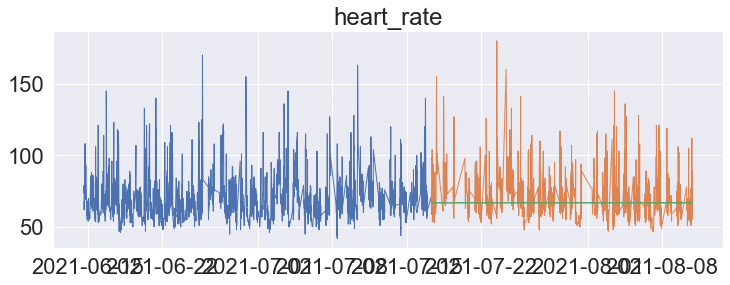

In [49]:
for col in train.columns:
    if col != 'month':
        plot_and_eval(col, yhat_df_moving_avg)
    else:
        break;

# Test Model: Moving Average

In [86]:
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 
period = 30

hr = round(test['heart_rate'].rolling(period).mean().iloc[-1], 2)


yhat_df_moving_avg_test = make_predictions() #Using predictions function
yhat_df_moving_avg_test.head(3)

,heart_rate
start_time,
2021-07-01 00:00:00,61.93
2021-07-01 01:00:00,61.93
2021-07-01 01:54:33,61.93


heart_rate -- RMSE: 15


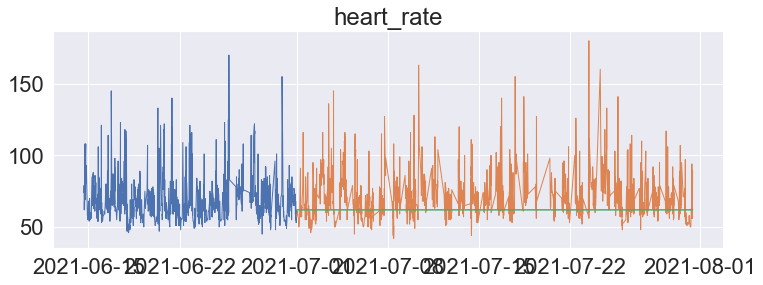

In [87]:
for col in train.columns:
    if col != 'month':
        plot_and_eval(col, yhat_df_moving_avg_test)
    else:
        break;

# Conclusion: 
    The best forecasting models is the the Moving average model and Simple Moving Average.
    - The Moving average model performed well on all the datasets and was not overfit.
    -The Last Observed Value model performed the worse
    - Dataset does not have enough data to be useful.
    - Next Steps:
        - Would need collect more data to have more accurate data and improve model.
        - further limit the columns in the dataset 
        - create more meaningful features to add to the model.